In [1]:
repo_root = "../"
import sys
sys.path.append(repo_root)

In [2]:
#imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

In [3]:
base_color = "#8ACE00"
brat_color = sns.dark_palette(base_color, n_colors=2)[1]

#colors for sentiment:
negative_shade = sns.dark_palette(base_color, n_colors=3)[0]
neutral_shade = sns.light_palette(base_color, n_colors=5)[1]
positive_shade =  sns.dark_palette(base_color, n_colors=3)[2]

In [4]:
#data imports 
filename = "../results/YouTube-with-sentiments_24-11-2024_15h52.csv"
youtube = pd.read_csv(filename)
#youtube.head()

filename = "../results/TikTok-with-sentiments_24-11-2024_15h12.csv"
tiktok = pd.read_csv(filename)

filename = "../results/Reddit-with-sentiments_24-11-2024_15h12.csv"
reddit = pd.read_csv(filename)

In [5]:
def byebyelestrucsinutiles(x):
    return x[:10]

youtube["Timestamp"] = youtube["Timestamp"].apply(byebyelestrucsinutiles)

# Threshold

In [6]:
def threshold(x):
    if x > 0.8: #Asrbitrairement mis à 0.8 pour ce petit test.
        return True
    else: return False

tiktok["is_positive"]=tiktok["positive"].apply(threshold)
tiktok["is_neutral"]=tiktok["neutral"].apply(threshold)
tiktok["is_negative"]=tiktok["negative"].apply(threshold)

tiktok.head(10)

,Unnamed: 0,Comment Number (ID),Nickname,User @,User URL,Comment Text,Time,Likes,Profile Picture URL,Is 2nd Level Comment,...,post_shares,post_description,date_scraped,join_key,positive,neutral,negative,is_positive,is_neutral,is_negative
0,0,1,John Mac,johnm319,https://www.tiktok.com/@johnm319,Chartreuse pls 😭😭😭,2024-07-24,5,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,0,0.62,0.17,0.22,False,False,False
1,1,2,bbbo,shhhleb,https://www.tiktok.com/@shhhleb,watching them explain. I can’t breathe.,2024-07-23,21.7K,https://p16-sign-va.tiktokcdn.com/musically-ma...,No,...,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,1,0.56,0.17,0.27,False,False,False
2,2,3,Caroline Tvardy,carolinetvardy6,https://www.tiktok.com/@carolinetvardy6,Our gen z correspondent 😭😭😭😭,2024-07-23,16.5K,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,2,0.44,0.16,0.40,False,False,False
3,3,4,sofia,sofiam444_,https://www.tiktok.com/@sofiam444_,THEY PRINTED IT OUT😭😭😭,2024-07-23,13.2K,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,3,0.98,0.01,0.02,True,False,False
4,4,5,MEAGAN.with.an.A,meagan.with.an.a,https://www.tiktok.com/@meagan.with.an.a,"Me, an elder millennial, hearing “she’s brat” ...",2024-07-23,7401,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,4,0.16,0.40,0.43,False,False,False
5,5,6,Kelsey,kelbelcour,https://www.tiktok.com/@kelbelcour,I cannot believe this is real,2024-07-23,7327,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,5,0.06,0.03,0.90,False,False,True
6,6,7,Tracie333,960aeiididididjdjcjfi,https://www.tiktok.com/@960aeiididididjdjcjfi,"Just by them discussing it, BRAT is now NOT go...",2024-07-23,2725,https://p77-sign-va-lite.tiktokcdn.com/tos-mal...,No,...,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,6,0.04,0.06,0.90,False,False,True
7,7,8,Erika Boyle,be.erika,https://www.tiktok.com/@be.erika,This is giving “what is internet”,2024-07-23,5463,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,7,0.60,0.31,0.09,False,False,False
8,8,9,rejectedun1corn,rejectedun1corn,https://www.tiktok.com/@rejectedun1corn,Printing it out is iconic. 😂,2024-07-23,4273,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,8,0.98,0.01,0.01,True,False,False
9,9,10,user2054789216507,npawlic,https://www.tiktok.com/@npawlic,“That is a cool thing” 😭,2024-07-23,4443,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,4913,"Crée des effets TikTok, reçois une récompense",2024-11-10,9,0.99,0.00,0.01,True,False,False


<Axes: xlabel='negative', ylabel='positive'>

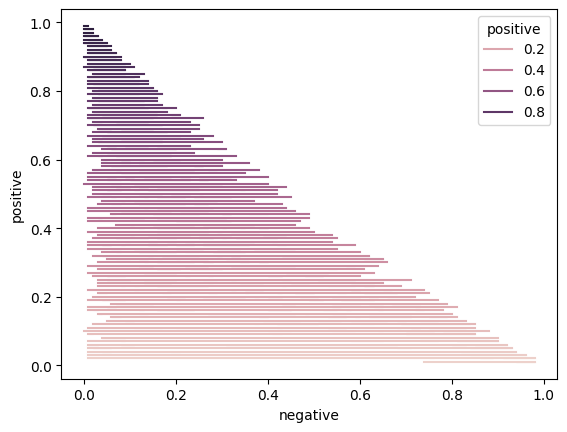

In [7]:
sns.lineplot(x="negative", y="positive",
            hue = "positive",
             data=tiktok)#,
             #palette="#8ACE00")

# Sentiment (max), per social media

In [8]:
#  sentiment analysis of comments

def choose_max_score(x,y,z):
    """simple implémentation du max en faisant attention à garder trace du sentiment."""
    if (x,y,z)==(0,0,0): print('wtf?')

    max1,max2=0,0
    ind1,ind2=-1,-1
    for i,el in enumerate([x,y,z]):
        if el >= max1:
            max1,max2 = el,max1
            ind1,ind2 = i,ind1
        
    correspondances = {0:"positive", 1:"neutral", 2:"negative"}

    return correspondances[ind1]

# youtube["sentiment"] = youtube.apply(lambda x: one_column_to_rule_them_all(x.is_positive, x.is_neutral, x.is_negative), axis=1)
youtube["sentiment"] = youtube.apply(lambda x: choose_max_score(x.positive, x.neutral, x.negative), axis=1)
tiktok["sentiment"] = tiktok.apply(lambda x: choose_max_score(x.positive, x.neutral, x.negative), axis=1)
reddit["sentiment"] = reddit.apply(lambda x: choose_max_score(x.positive, x.neutral, x.negative), axis=1)

In [10]:
tiktok

,Unnamed: 0,Comment Number (ID),Nickname,User @,User URL,Comment Text,Time,Likes,Profile Picture URL,Is 2nd Level Comment,...,post_description,date_scraped,join_key,positive,neutral,negative,is_positive,is_neutral,is_negative,sentiment
0,0,1,John Mac,johnm319,https://www.tiktok.com/@johnm319,Chartreuse pls 😭😭😭,2024-07-24,5,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,"Crée des effets TikTok, reçois une récompense",2024-11-10,0,0.62,0.17,0.22,False,False,False,positive
1,1,2,bbbo,shhhleb,https://www.tiktok.com/@shhhleb,watching them explain. I can’t breathe.,2024-07-23,21.7K,https://p16-sign-va.tiktokcdn.com/musically-ma...,No,...,"Crée des effets TikTok, reçois une récompense",2024-11-10,1,0.56,0.17,0.27,False,False,False,positive
2,2,3,Caroline Tvardy,carolinetvardy6,https://www.tiktok.com/@carolinetvardy6,Our gen z correspondent 😭😭😭😭,2024-07-23,16.5K,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,"Crée des effets TikTok, reçois une récompense",2024-11-10,2,0.44,0.16,0.40,False,False,False,positive
3,3,4,sofia,sofiam444_,https://www.tiktok.com/@sofiam444_,THEY PRINTED IT OUT😭😭😭,2024-07-23,13.2K,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,"Crée des effets TikTok, reçois une récompense",2024-11-10,3,0.98,0.01,0.02,True,False,False,positive
4,4,5,MEAGAN.with.an.A,meagan.with.an.a,https://www.tiktok.com/@meagan.with.an.a,"Me, an elder millennial, hearing “she’s brat” ...",2024-07-23,7401,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,"Crée des effets TikTok, reçois une récompense",2024-11-10,4,0.16,0.40,0.43,False,False,False,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18133,18133,893,Carter Tesh,cartertesh,https://www.tiktok.com/@cartertesh,Aesthetic is not a gen Z word 😭 are they OK,2024-07-23,0,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,"Crée des effets TikTok, reçois une récompense",2024-11-10,18133,0.01,0.02,0.97,False,False,True,negative
18134,18134,894,GirlsGirlK3llz,girlsgirlk3llz,https://www.tiktok.com/@girlsgirlk3llz,HARRIS,2024-07-23,0,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,"Crée des effets TikTok, reçois une récompense",2024-11-10,18134,0.55,0.29,0.16,False,False,False,positive
18135,18135,895,DIOS SOBRE TODO,dios.sobre.todo98,https://www.tiktok.com/@dios.sobre.todo98,So happy you came into my life sir God bless y...,2024-07-23,0,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,"Crée des effets TikTok, reçois une récompense",2024-11-10,18135,0.92,0.03,0.04,True,False,False,positive
18136,18136,896,sara-no-h 🏳️‍🌈,_sara_no_h__,https://www.tiktok.com/@_sara_no_h__,that was some of the best entertainment I've s...,2024-07-23,0,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,"Crée des effets TikTok, reçois une récompense",2024-11-10,18136,0.98,0.01,0.01,True,False,False,positive


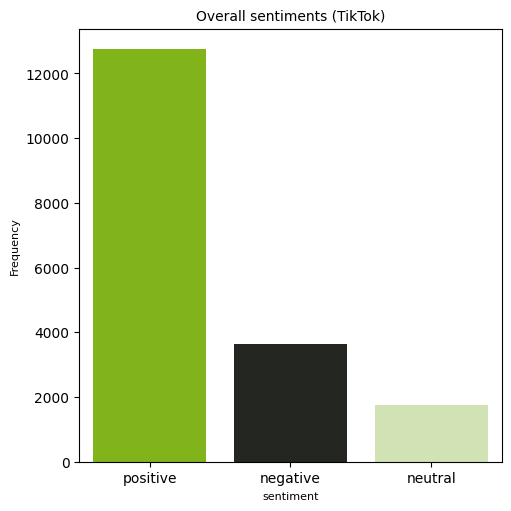

In [13]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

sns.countplot(
        data = tiktok, #keep only those where it is true
        x='sentiment',
        hue='sentiment',
        palette={'negative':negative_shade, 'neutral': neutral_shade, 'positive':positive_shade}, 
        ax=ax)
    # ax.set_title(f'Sentiment when {contains_michel} (threshold: {t})', fontsize=10) 
ax.set_title(f"Overall sentiments (TikTok)", fontsize=10) 
ax.set_xlabel('sentiment', fontsize=8)
ax.set_ylabel('Frequency', fontsize=8)
plt.savefig('../viz/sentiment_tiktok.png',bbox_inches='tight', transparent=True, dpi=300)

## Contains Kamala

In [9]:
nb_kamala_youtube =  youtube['Comment'].str.contains('kamala', case = False, regex=True).sum()
nb_kamala_tiktok =  tiktok['Comment Text'].str.contains('kamala', case = False, regex=True).sum()
nb_kamala_reddit =  reddit['comment_content'].str.contains('kamala', case = False, regex=True).sum()

print(nb_kamala_youtube,nb_kamala_tiktok, nb_kamala_reddit)

total_yt, total_tiktok, total_reddit = youtube.shape[0], tiktok.shape[0], reddit.shape[0]

print(total_yt, total_tiktok, total_reddit)

1936 1894 30
13569 18138 250


In [19]:
youtube['contains_kamala'] = youtube['Comment'].str.contains('kamala', case = False, regex=True)
tiktok['contains_kamala'] = tiktok['Comment Text'].str.contains('kamala', case = False, regex=True)
reddit['contains_kamala'] = reddit['comment_content'].str.contains('kamala', case = False, regex=True)

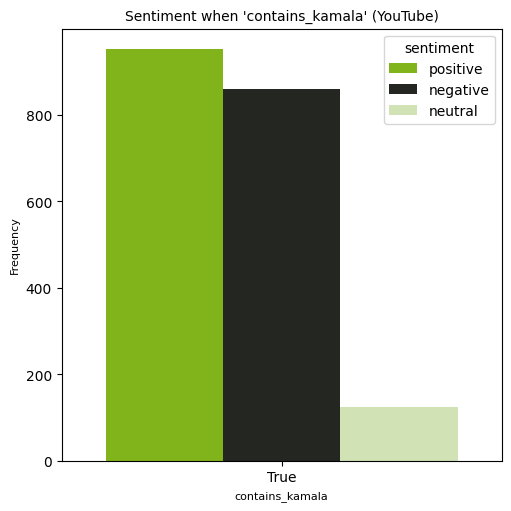

In [22]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

sns.countplot(
        data = youtube[youtube['contains_kamala']], #keep only those where it is true
        x='contains_kamala',
        hue='sentiment',
        palette={'negative':negative_shade, 'neutral': neutral_shade, 'positive':positive_shade}, 
        ax=ax)
    # ax.set_title(f'Sentiment when {contains_michel} (threshold: {t})', fontsize=10) 
ax.set_title(f"Sentiment when 'contains_kamala' (YouTube)", fontsize=10) 
ax.set_xlabel('contains_kamala', fontsize=8)
ax.set_ylabel('Frequency', fontsize=8)
plt.savefig('../viz/sentiment_kamala_youtube.png',bbox_inches='tight', transparent=True, dpi=300)

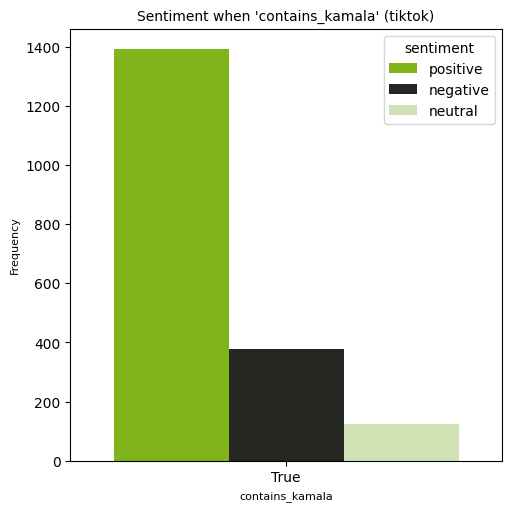

In [36]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')


sns.countplot(
        data = tiktok[tiktok['contains_kamala']], #keep only those where it is true
        x='contains_kamala',
        hue='sentiment',
        palette={'negative':negative_shade, 'neutral': neutral_shade, 'positive':positive_shade}, 
        hue_order=["positive", 'negative', 'neutral'],
        ax=ax)
    # ax.set_title(f'Sentiment when {contains_michel} (threshold: {t})', fontsize=10) 
ax.set_title(f"Sentiment when 'contains_kamala' (tiktok)", fontsize=10) 
ax.set_xlabel('contains_kamala', fontsize=8)
ax.set_ylabel('Frequency', fontsize=8)
plt.savefig('../viz/sentiment_kamala_tiktok.png',bbox_inches='tight', transparent=True, dpi=300)

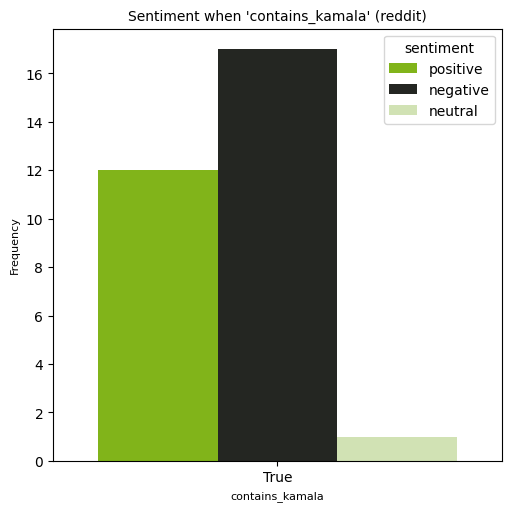

In [31]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')


sns.countplot(
        data = reddit[reddit['contains_kamala']], #keep only those where it is true
        x='contains_kamala',
        hue='sentiment',
        palette={'negative':negative_shade, 'neutral': neutral_shade, 'positive':positive_shade}, 
        ax=ax)
    # ax.set_title(f'Sentiment when {contains_michel} (threshold: {t})', fontsize=10) 
ax.set_title(f"Sentiment when 'contains_kamala' (reddit)", fontsize=10) 
ax.set_xlabel('contains_kamala', fontsize=8)
ax.set_ylabel('Frequency', fontsize=8)
plt.savefig('../viz/sentiment_kamala_reddit.png',bbox_inches='tight', transparent=True, dpi=300)

## Now, I do the same graph but with all social medias together:

In [27]:
youtube_small = youtube[["Comment", "sentiment"]]
# youtube_small.rename(columns={"Comment":"Comment", "sentiment":"sentiment"}, inplace=True)
youtube_small["media"] = ["youtube" for _ in range(youtube.shape[0])]

tiktok_small = tiktok[["Comment Text", "sentiment"]]
tiktok_small.rename(columns={"Comment Text":"Comment", "sentiment":"sentiment"}, inplace=True)
tiktok_small["media"] = ["tiktok" for _ in range(tiktok.shape[0])]

reddit_small = reddit[["comment_content", "sentiment"]]
reddit_small.rename(columns={"comment_content":"Comment", "sentiment":"sentiment"}, inplace=True)
reddit_small["media"] = ["reddit" for _ in range(reddit.shape[0])]

#tiktok.dropna(axis=0, subset="Comment", inplace=True) # there is one nan that need to be removed

/var/folders/d9/w3wlldnd20s584r1s8_wcqlh0000gp/T/ipykernel_18144/3529063308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_small["media"] = ["youtube" for _ in range(youtube.shape[0])]
/var/folders/d9/w3wlldnd20s584r1s8_wcqlh0000gp/T/ipykernel_18144/3529063308.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiktok_small.rename(columns={"Comment Text":"Comment", "sentiment":"sentiment"}, inplace=True)
/var/folders/d9/w3wlldnd20s584r1s8_wcqlh0000gp/T/ipykernel_18144/3529063308.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [32]:
all_comments_with_sentiment = pd.concat([youtube_small, tiktok_small, reddit_small], axis = 0)

all_comments_with_sentiment['contains_kamala'] = all_comments_with_sentiment['Comment'].str.contains('kamala', case = False, regex=True)



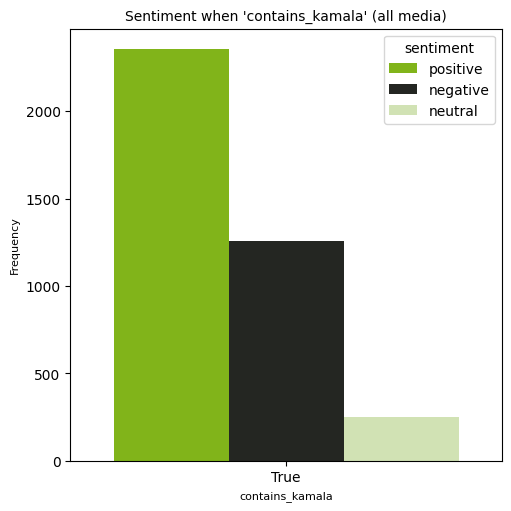

In [33]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')


sns.countplot(
        data = all_comments_with_sentiment[all_comments_with_sentiment['contains_kamala']], #keep only those where it is true
        x='contains_kamala',
        hue='sentiment',
        palette={'negative':negative_shade, 'neutral': neutral_shade, 'positive':positive_shade}, 
        ax=ax)
    # ax.set_title(f'Sentiment when {contains_michel} (threshold: {t})', fontsize=10) 
ax.set_title(f"Sentiment when 'contains_kamala' (all media)", fontsize=10) 
ax.set_xlabel('contains_kamala', fontsize=8)
ax.set_ylabel('Frequency', fontsize=8)
plt.savefig('../viz/sentiment_kamala_all_media.png',bbox_inches='tight', transparent=True, dpi=300)

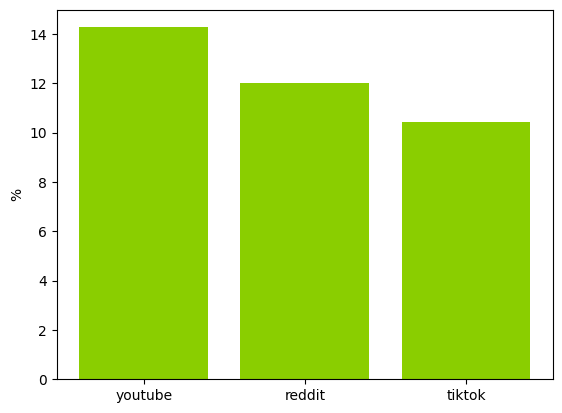

In [7]:
import matplotlib.pyplot as plt

proportion_yt, proportion_tiktok, proportion_reddit = (nb_kamala_youtube / total_yt)*100, (nb_kamala_tiktok / total_tiktok)*100, (nb_kamala_reddit / total_reddit)*100


plt.figure()
plt.ylabel("%")
plt.bar(x = [1, 2, 3], height=[proportion_yt, proportion_reddit, proportion_tiktok], tick_label = ["youtube", "reddit", "tiktok"], color = "#8ACE00")
plt.show()

In [26]:
proportion_yt

14.267816346082984

In [36]:
youtube

,Unnamed: 0.1,Unnamed: 0,Timestamp,Username,VideoID,Comment,Date,Modified,NbLikes,join_key,positive,neutral,negative
0,0,0,2024-11-04T16:26:49Z,@st8275,Js4qqwdjA9M,Dufus-in-chief,2024-11-04T16:26:49Z,True,1,0,0.61,0.27,0.12
1,1,1,2024-11-04T14:11:51Z,@comingforya690,Js4qqwdjA9M,I thought the liberals hate the rich? Lmfao th...,2024-11-04T14:11:51Z,True,0,1,0.10,0.10,0.80
2,2,2,2024-11-04T12:59:38Z,@2ndhk552,Js4qqwdjA9M,Who gives af,2024-11-04T12:59:38Z,True,0,2,0.11,0.14,0.76
3,3,3,2024-11-04T03:08:23Z,@___KPR,Js4qqwdjA9M,No babe we don’t need your opinion babe. Trump...,2024-11-04T03:08:23Z,True,0,3,0.68,0.28,0.04
4,4,4,2024-11-02T20:11:12Z,@cynthiabarrow509,Js4qqwdjA9M,Yeah this will sway the vote,2024-11-02T20:11:12Z,True,0,4,0.94,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13564,13564,13568,2024-07-27T17:08:30Z,@punchkitten874,1EuF7yfoyDE,🐑🐑🐑,2024-07-27T17:08:30Z,True,1,13564,0.46,0.33,0.20
13565,13565,13569,2024-07-27T17:00:23Z,@Daniel_B_23,1EuF7yfoyDE,First,2024-07-27T17:00:23Z,True,0,13565,0.47,0.34,0.19
13566,13566,13570,2024-07-27T17:02:46Z,@Phoenix_cc,1EuF7yfoyDE,"No, I am, if you go to newest comments and scr...",2024-07-27T17:02:46Z,True,0,13566,0.64,0.33,0.03
13567,13567,13571,2024-07-27T17:00:22Z,@Phoenix_cc,1EuF7yfoyDE,FIRST COMMENT AND LIKE,2024-07-27T17:00:22Z,True,6,13567,0.72,0.22,0.06


In [45]:
import datetime
d = datetime.datetime(2024,7,22)
d.month

7

In [42]:
def byebyelestrucsinutiles(x):
    return x[:10]

youtube["Timestamp"] = youtube["Timestamp"].apply(byebyelestrucsinutiles)

youtube

,Unnamed: 0.1,Unnamed: 0,Timestamp,Username,VideoID,Comment,Date,Modified,NbLikes,join_key,positive,neutral,negative
0,0,0,2024-11-04,@st8275,Js4qqwdjA9M,Dufus-in-chief,2024-11-04,True,1,0,0.61,0.27,0.12
1,1,1,2024-11-04,@comingforya690,Js4qqwdjA9M,I thought the liberals hate the rich? Lmfao th...,2024-11-04,True,0,1,0.10,0.10,0.80
2,2,2,2024-11-04,@2ndhk552,Js4qqwdjA9M,Who gives af,2024-11-04,True,0,2,0.11,0.14,0.76
3,3,3,2024-11-04,@___KPR,Js4qqwdjA9M,No babe we don’t need your opinion babe. Trump...,2024-11-04,True,0,3,0.68,0.28,0.04
4,4,4,2024-11-02,@cynthiabarrow509,Js4qqwdjA9M,Yeah this will sway the vote,2024-11-02,True,0,4,0.94,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13564,13564,13568,2024-07-27,@punchkitten874,1EuF7yfoyDE,🐑🐑🐑,2024-07-27,True,1,13564,0.46,0.33,0.20
13565,13565,13569,2024-07-27,@Daniel_B_23,1EuF7yfoyDE,First,2024-07-27,True,0,13565,0.47,0.34,0.19
13566,13566,13570,2024-07-27,@Phoenix_cc,1EuF7yfoyDE,"No, I am, if you go to newest comments and scr...",2024-07-27,True,0,13566,0.64,0.33,0.03
13567,13567,13571,2024-07-27,@Phoenix_cc,1EuF7yfoyDE,FIRST COMMENT AND LIKE,2024-07-27,True,6,13567,0.72,0.22,0.06


In [43]:
youtube["Timestamp"] = pd.to_datetime(youtube['Timestamp'], format='%Y-%m-%d')

In [47]:
youtube[youtube["Timestamp"] > d]

,Unnamed: 0.1,Unnamed: 0,Timestamp,Username,VideoID,Comment,Date,Modified,NbLikes,join_key,positive,neutral,negative
0,0,0,2024-11-04,@st8275,Js4qqwdjA9M,Dufus-in-chief,2024-11-04,True,1,0,0.61,0.27,0.12
1,1,1,2024-11-04,@comingforya690,Js4qqwdjA9M,I thought the liberals hate the rich? Lmfao th...,2024-11-04,True,0,1,0.10,0.10,0.80
2,2,2,2024-11-04,@2ndhk552,Js4qqwdjA9M,Who gives af,2024-11-04,True,0,2,0.11,0.14,0.76
3,3,3,2024-11-04,@___KPR,Js4qqwdjA9M,No babe we don’t need your opinion babe. Trump...,2024-11-04,True,0,3,0.68,0.28,0.04
4,4,4,2024-11-02,@cynthiabarrow509,Js4qqwdjA9M,Yeah this will sway the vote,2024-11-02,True,0,4,0.94,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13564,13564,13568,2024-07-27,@punchkitten874,1EuF7yfoyDE,🐑🐑🐑,2024-07-27,True,1,13564,0.46,0.33,0.20
13565,13565,13569,2024-07-27,@Daniel_B_23,1EuF7yfoyDE,First,2024-07-27,True,0,13565,0.47,0.34,0.19
13566,13566,13570,2024-07-27,@Phoenix_cc,1EuF7yfoyDE,"No, I am, if you go to newest comments and scr...",2024-07-27,True,0,13566,0.64,0.33,0.03
13567,13567,13571,2024-07-27,@Phoenix_cc,1EuF7yfoyDE,FIRST COMMENT AND LIKE,2024-07-27,True,6,13567,0.72,0.22,0.06


In [54]:
tiktok["Time"] = pd.to_datetime(tiktok["Time"], format='%Y-%m-%d')

tiktok[tiktok["Time"] < d]

,Unnamed: 0,Comment Number (ID),Nickname,User @,User URL,Comment Text,Time,Likes,Profile Picture URL,Is 2nd Level Comment,...,difference,publisher,post_likes,post_shares,post_description,date_scraped,join_key,positive,neutral,negative
1008,1008,1,clea,h3xgirl,https://www.tiktok.com/@h3xgirl,MAKE THIS AN AUDIO,2024-07-01,2466,https://p77-sign-va-lite.tiktokcdn.com/tos-mal...,No,...,352,temhota36,217.6K,15.2K,"Crée des effets TikTok, reçois une récompense",2024-11-04,1008,0.60,0.25,0.15
1009,1009,2,meri 💌,super.cool_.person,https://www.tiktok.com/@super.cool_.person,wait i get what shes saying now,2024-07-02,4315,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,352,temhota36,217.6K,15.2K,"Crée des effets TikTok, reçois une récompense",2024-11-04,1009,0.27,0.51,0.22
1010,1010,3,h1ntze,h1ntze,https://www.tiktok.com/@h1ntze,Will she work it out on the remix?,2024-07-01,4035,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,352,temhota36,217.6K,15.2K,"Crée des effets TikTok, reçois une récompense",2024-11-04,1010,0.75,0.24,0.01
1011,1011,4,keke420purr,keke420purr,https://www.tiktok.com/@keke420purr,Wait im mad at how well this fits 😭,2024-07-01,5084,https://p77-sign-va-lite.tiktokcdn.com/tos-mal...,No,...,352,temhota36,217.6K,15.2K,"Crée des effets TikTok, reçois une récompense",2024-11-04,1011,0.96,0.01,0.03
1012,1012,5,yooo,pumpkin.guts,https://www.tiktok.com/@pumpkin.guts,wait but i think that makes perfect sense…,2024-07-01,978,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,No,...,352,temhota36,217.6K,15.2K,"Crée des effets TikTok, reçois une récompense",2024-11-04,1012,0.98,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8844,8844,1574,TheHappyTree,the.happy.tree,https://www.tiktok.com/@the.happy.tree,HARRIS 2024,2024-07-21,0,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,1867,mebbytoks,453K,14.2K,"Crée des effets TikTok, reçois une récompense",2024-11-10,8844,0.69,0.23,0.08
8845,8845,1575,🐠,tackkv,https://www.tiktok.com/@tackkv,HARRIS 2024 🥥🌴🇺🇸,2024-07-21,0,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,1867,mebbytoks,453K,14.2K,"Crée des effets TikTok, reçois une récompense",2024-11-10,8845,0.95,0.04,0.01
8846,8846,1576,miffymaiden,miffymaiden,https://www.tiktok.com/@miffymaiden,Vote for Kennedy! 🫶🏼,2024-07-21,0,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,1867,mebbytoks,453K,14.2K,"Crée des effets TikTok, reçois une récompense",2024-11-10,8846,0.83,0.14,0.03
8847,8847,1577,ella,nichtdiebanke,https://www.tiktok.com/@nichtdiebanke,aged well in one part now we need it to age we...,2024-07-21,0,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,No,...,1867,mebbytoks,453K,14.2K,"Crée des effets TikTok, reçois une récompense",2024-11-10,8847,0.73,0.16,0.11


In [8]:
youtube[youtube["Comment"] == "Kamala Harris is a Christian hater and a baby hater."]

,Unnamed: 0.1,Unnamed: 0,Timestamp,Username,VideoID,Comment,Date,Modified,NbLikes,join_key,positive,neutral,negative
23,23,23,2024-10-23T00:17:07Z,@artspeakman,Js4qqwdjA9M,Kamala Harris is a Christian hater and a baby ...,2024-10-23T00:17:07Z,True,1,23,0.01,0.01,0.98


In [10]:
reddit.head()

NameError: name 'reddit' is not defined

In [9]:
nb_kamala_youtube =  youtube['Comment'].str.contains('kamala', case = False, regex=True).sum()
nb_kamala_tiktok =  tiktok['Comment Text'].str.contains('kamala', case = False, regex=True).sum()
nb_kamala_reddit = 

nb_kamala_youtube

1936